## Introduction
In this lab, we will learn how to use LabelPropagation to learn the labels of unknown samples from labeled samples. We will generate a dataset containing two concentric circles and assign labels to each sample. Then, we will use LabelPropagation to learn the labels of the unknown samples.

## Import Required Libraries
We start by importing the required libraries for this lab.

In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading

## Generate Dataset
Next, we generate a dataset containing two concentric circles using make_circles. We assign labels to the dataset such that all samples are unknown except for two samples which belong to the outer and inner circles respectively.

In [2]:
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
labels[0] = outer
labels[-1] = inner

## Plot Raw Data
We plot the raw data to visualize the circles and labels.

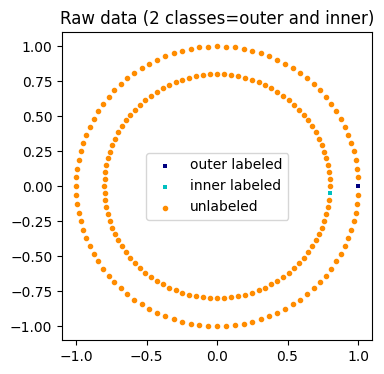

In [3]:
plt.figure(figsize=(4, 4))
plt.scatter(
    X[labels == outer, 0],
    X[labels == outer, 1],
    color="navy",
    marker="s",
    lw=0,
    label="outer labeled",
    s=10,
)
plt.scatter(
    X[labels == inner, 0],
    X[labels == inner, 1],
    color="c",
    marker="s",
    lw=0,
    label="inner labeled",
    s=10,
)
plt.scatter(
    X[labels == -1, 0],
    X[labels == -1, 1],
    color="darkorange",
    marker=".",
    label="unlabeled",
)
plt.legend(scatterpoints=1, shadow=False, loc="center")
_ = plt.title("Raw data (2 classes=outer and inner)")

## Learn Labels with LabelPropagation
We use LabelSpreading to learn the labels of the unknown samples.

In [4]:
label_spread = LabelSpreading(kernel="knn", alpha=0.8)
label_spread.fit(X, labels)

LabelSpreading(alpha=0.8, kernel='knn')

## Plot Learned Labels
Finally, we plot the learned labels to visualize the accuracy of LabelPropagation.

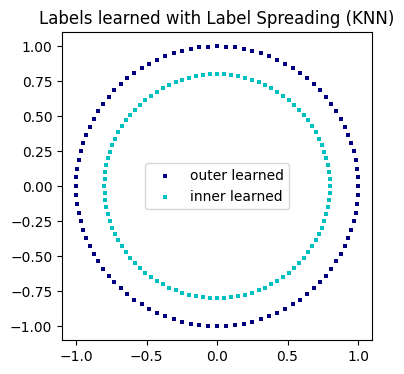

In [5]:
output_labels = label_spread.transduction_
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]

plt.figure(figsize=(4, 4))
plt.scatter(
    X[outer_numbers, 0],
    X[outer_numbers, 1],
    color="navy",
    marker="s",
    lw=0,
    s=10,
    label="outer learned",
)
plt.scatter(
    X[inner_numbers, 0],
    X[inner_numbers, 1],
    color="c",
    marker="s",
    lw=0,
    s=10,
    label="inner learned",
)
plt.legend(scatterpoints=1, shadow=False, loc="center")
plt.title("Labels learned with Label Spreading (KNN)")
plt.show()

## Summary
In this lab, we learned how to use LabelPropagation to learn the labels of unknown samples from labeled samples. We generated a dataset containing two concentric circles and assigned labels to each sample. Then, we used LabelPropagation to learn the labels of the unknown samples and visualized the accuracy of the learned labels.